**Import packages**

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
import sweetviz

**Import data**

In [2]:
def dataset(file, year): 
    # Read csv file 
    df = pd.read_csv(file)
    
    # Drop columns that relates to ID 
    columns_to_drop = ["Y1", "YY1", "EMERGPSTP"]
    
    cols = []
    # Statistics of missing values 
    for col in df.columns:
        # Calculate the missing value in % 
        missing_percent = df[col].isna().mean() * 100

        # Append column to columns_to_drop if missing value is less than 5% 
        if (missing_percent > 0) & (missing_percent < 5):
                cols.append(col)
    
    # Drop rows where NAs exists 
    df.dropna(subset=cols, inplace=True)
    
    # Assign a column named year
    df['YEAR'] = year
    
    
    # Create new age group category 
    group = [(df['AGE']<35), 
          (df['AGE'] >= 35) & (df['AGE'] < 45),
          (df['AGE'] >= 45) & (df['AGE'] < 55),
          (df['AGE'] >= 55) & (df['AGE'] < 65),
          (df['AGE'] >= 65) & (df['AGE'] < 75),
          (df['AGE'] >= 75)]

    category = ['< 35', '35 - 44', '45 - 54', '55 - 64', '65 - 74', '>=75']

    df['CATEGORY'] = np.select(group, category)
    
    # Drop columns     
    df.drop(columns = [x for x in columns_to_drop if x in df.columns], inplace=True)
    
    return df
    

In [3]:
# Read data
df_2010 = dataset("SCFP2010.csv", 2010)
df_2013 = dataset("SCFP2013.csv", 2013)
df_2019 = dataset("SCFP2019.csv", 2019)

In [4]:
# Combine data from 2010, 2013 and 2019
df = pd.concat([df_2010, df_2013, df_2019], ignore_index=True, axis=0)

# View size of dataset
df.shape

(91360, 350)

In [110]:
df.head(4)

,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,LF,LIFECL,...,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT,YEAR,CATEGORY
0,7095.383370,1,75,6,9.0,3,1,0,1,5,...,4,3,2,8,6,6,3,3,2010,>=75
1,7139.730803,1,75,6,9.0,3,1,0,1,5,...,3,3,2,7,6,6,3,3,2010,>=75
2,7294.390247,1,75,6,9.0,3,1,0,1,5,...,4,3,2,8,7,6,3,3,2010,>=75
3,6989.430712,1,75,6,9.0,3,1,0,1,5,...,3,4,2,7,8,7,3,3,2010,>=75


In [109]:
df.to_csv('SCFP201039.csv', sep=',', index=False, encoding='utf-8')

In [ ]:
df.to_csv('Group 1 - Cleaned Data Set.csv', sep=',', index=False, encoding='utf-8')

**Age group distribution who been have turned down for credit in the past 5 years**

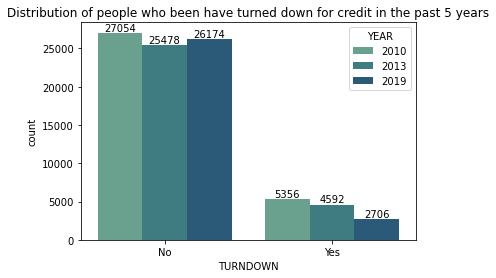

In [130]:
# Frequency plot 
plt1 = sns.countplot(x="TURNDOWN", 
                     hue="YEAR",
                     data=df,
                     palette="crest")

# Add labels
for i in plt1.containers:
    plt1.bar_label(i, size=10)

plt.title("Distribution of people who been have turned down for credit in the past 5 years")
plt.xticks([0, 1], ['No', 'Yes'])
plt.xticks();

**Age group distribution who been have turned down for credit or feared being denied credit in the past 5 years**

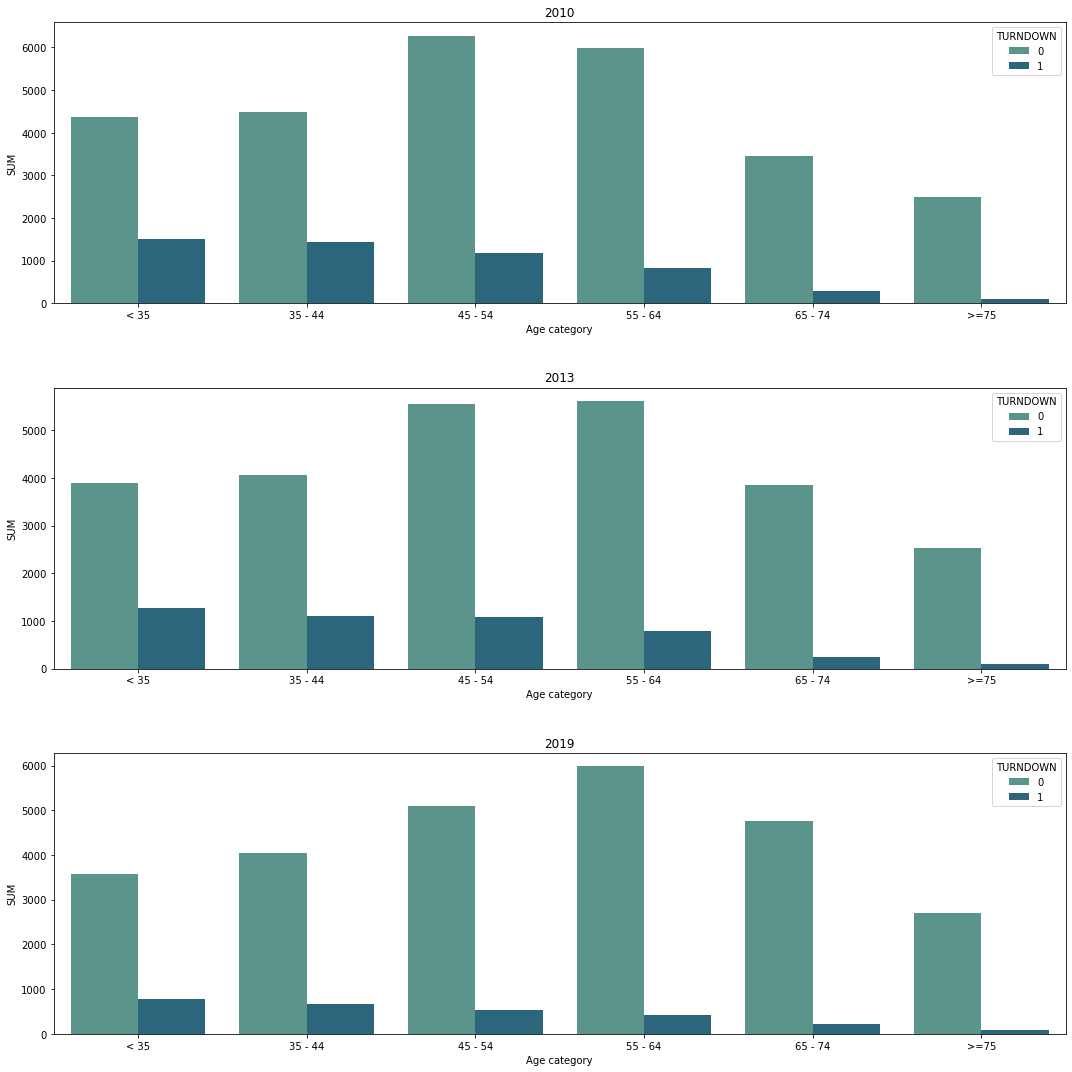

In [143]:
df_age_turnfear = df.groupby(["YEAR", "CATEGORY", "TURNDOWN"]).size().reset_index()
df_age_turnfear.rename(columns = {0:'SUM'}, inplace=True)

fig, axs = plt.subplots(nrows=3, figsize=(15, 15)) 

plt1 = sns.barplot(x="CATEGORY", y="SUM",hue="TURNDOWN", data=df_age_turnfear[df_age_turnfear['YEAR']==2010], palette="crest", ax=axs[0], order=['< 35', '35 - 44', '45 - 54', '55 - 64', '65 - 74', '>=75']).set(title='2010', xlabel='Age category')
plt2 = sns.barplot(x="CATEGORY", y="SUM",hue="TURNDOWN", data=df_age_turnfear[df_age_turnfear['YEAR']==2013], palette="crest", ax=axs[1], order=['< 35', '35 - 44', '45 - 54', '55 - 64', '65 - 74', '>=75']).set(title='2013', xlabel='Age category')
plt3 = sns.barplot(x="CATEGORY", y="SUM",hue="TURNDOWN", data=df_age_turnfear[df_age_turnfear['YEAR']==2019], palette="crest", ax=axs[2], order=['< 35', '35 - 44', '45 - 54', '55 - 64', '65 - 74', '>=75']).set(title='2019', xlabel='Age category')
    
fig.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()

EDCL: Education category of reference person

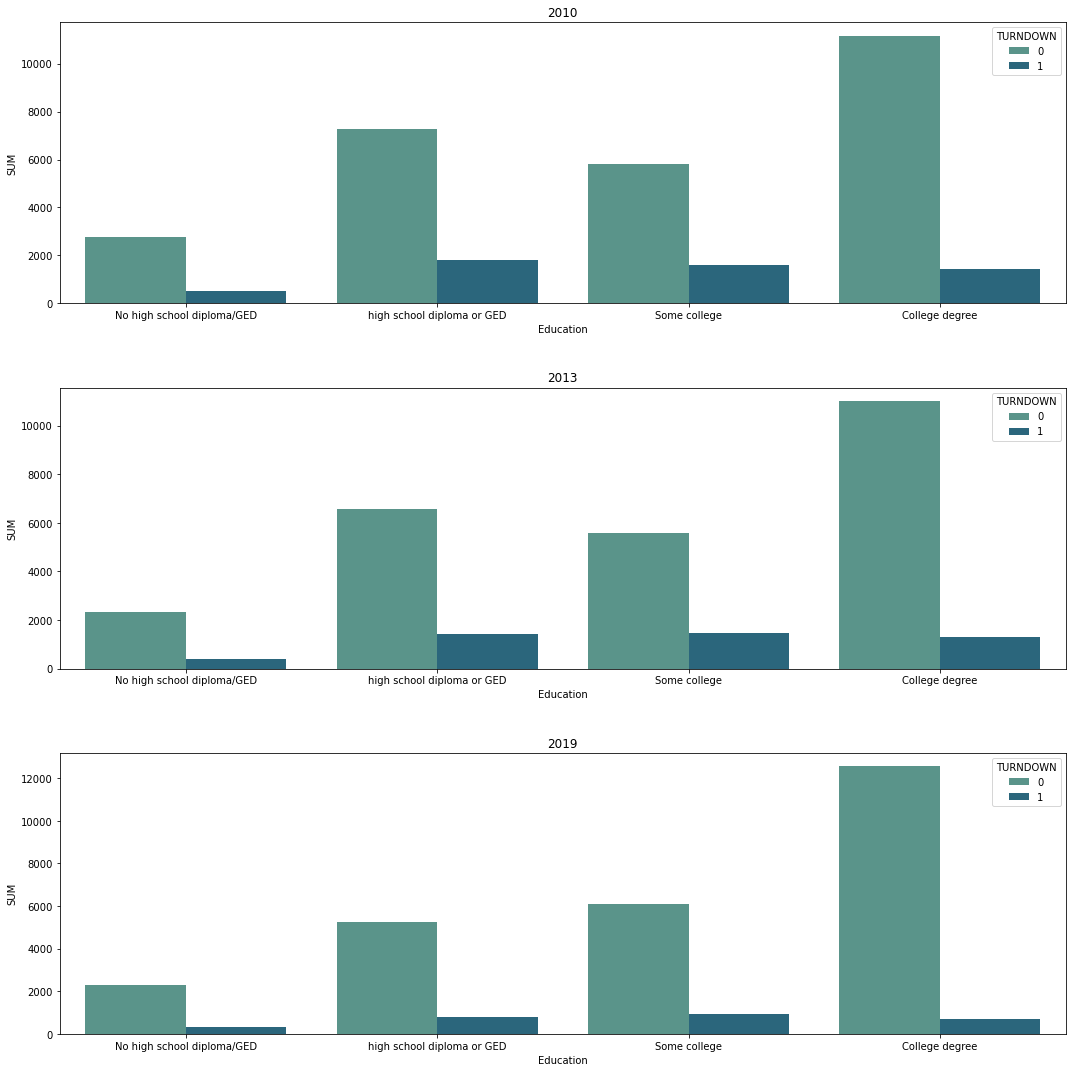

In [132]:
df_education = df.groupby(["YEAR", "EDCL", "TURNDOWN"]).size().reset_index()
df_education.rename(columns = {0:'SUM'}, inplace=True)

# Define a dictionary to replace categorical values 
cleanup_nums = {
        "EDCL": {1: "No high school diploma/GED", 
                 2: "high school diploma or GED", 
                 3: "Some college", 
                 4: "College degree"},
}

# Replace categorical values with numeric 
df_education = df_education.replace(cleanup_nums)

fig, axs = plt.subplots(nrows=3, figsize=(15, 15)) 

plt1 = sns.barplot(x="EDCL", y="SUM",hue="TURNDOWN", data=df_education[df_education['YEAR']==2010], palette="crest", ax=axs[0]).set(title='2010', xlabel='Education')
plt2 = sns.barplot(x="EDCL", y="SUM",hue="TURNDOWN", data=df_education[df_education['YEAR']==2013], palette="crest", ax=axs[1]).set(title='2013', xlabel='Education')
plt3 = sns.barplot(x="EDCL", y="SUM",hue="TURNDOWN", data=df_education[df_education['YEAR']==2019], palette="crest", ax=axs[2]).set(title='2019', xlabel='Education')

fig.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()


PIRREV: ratio of monthly revolving debt payments to monthly income

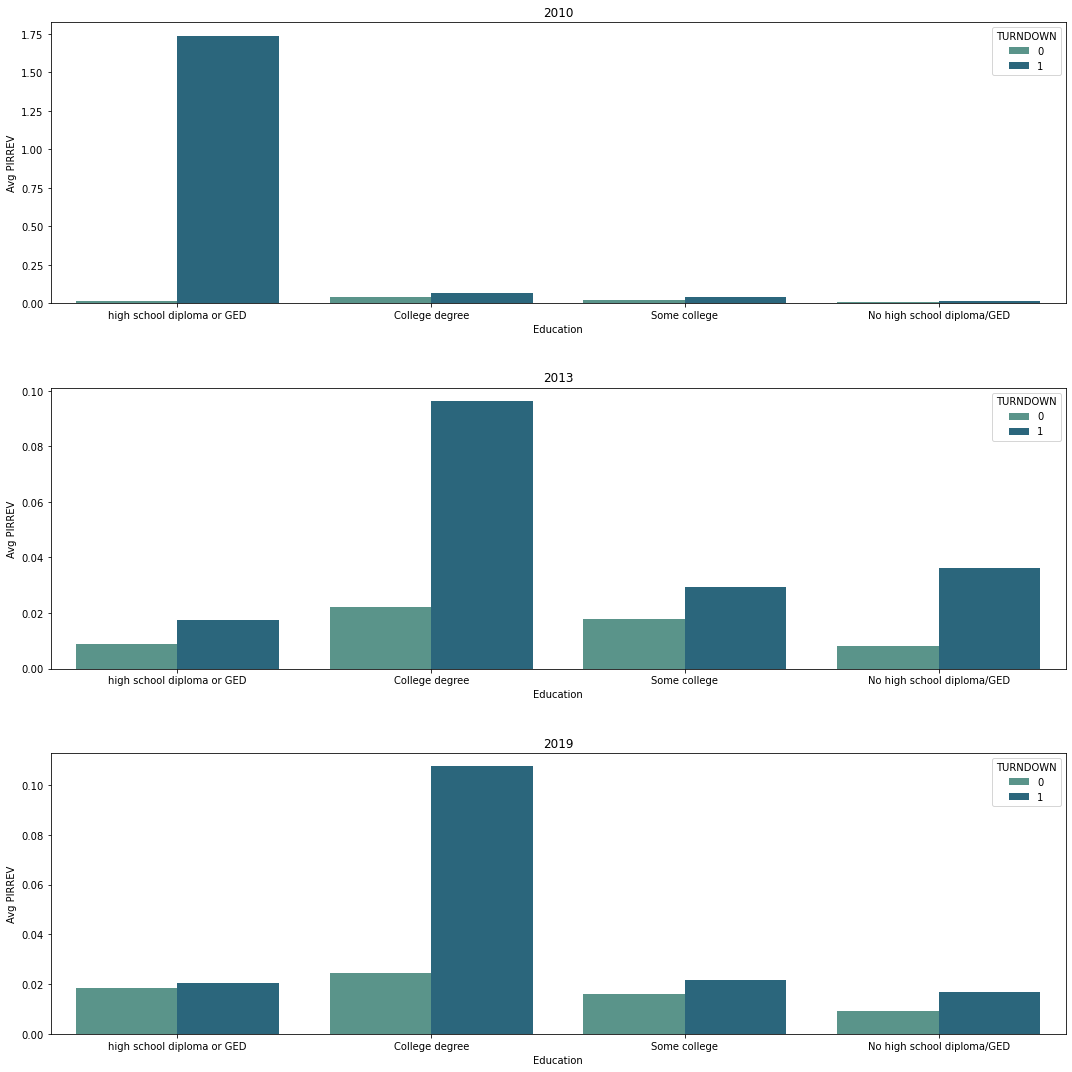

In [133]:
df_pirrev = df[["YEAR", "EDCL", "PIRREV", "TURNDOWN"]].groupby(["YEAR", "EDCL", "TURNDOWN"]).agg('mean').sort_values("PIRREV",ascending=False).reset_index() 

# Define a dictionary to replace categorical values 
cleanup_nums = {
        "EDCL": {1: "No high school diploma/GED", 
                 2: "high school diploma or GED", 
                 3: "Some college", 
                 4: "College degree"},
}

# Replace categorical values with numeric 
df_pirrev = df_pirrev.replace(cleanup_nums)

fig, axs = plt.subplots(nrows=3, figsize=(15, 15)) 

plt1 = sns.barplot(x="EDCL", y="PIRREV",hue="TURNDOWN", data=df_pirrev[df_pirrev['YEAR']==2010], palette="crest", ax=axs[0], order=[i for i in df_pirrev["EDCL"].unique()]).set(title='2010', xlabel='Education', ylabel='Avg PIRREV')
plt2 = sns.barplot(x="EDCL", y="PIRREV",hue="TURNDOWN", data=df_pirrev[df_pirrev['YEAR']==2013], palette="crest", ax=axs[1], order=[i for i in df_pirrev["EDCL"].unique()]).set(title='2013', xlabel='Education', ylabel='Avg PIRREV')
plt3 = sns.barplot(x="EDCL", y="PIRREV",hue="TURNDOWN", data=df_pirrev[df_pirrev['YEAR']==2019], palette="crest", ax=axs[2], order=[i for i in df_pirrev["EDCL"].unique()]).set(title='2019', xlabel='Education', ylabel='Avg PIRREV')

fig.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()

INCCAT: Income percentile groups

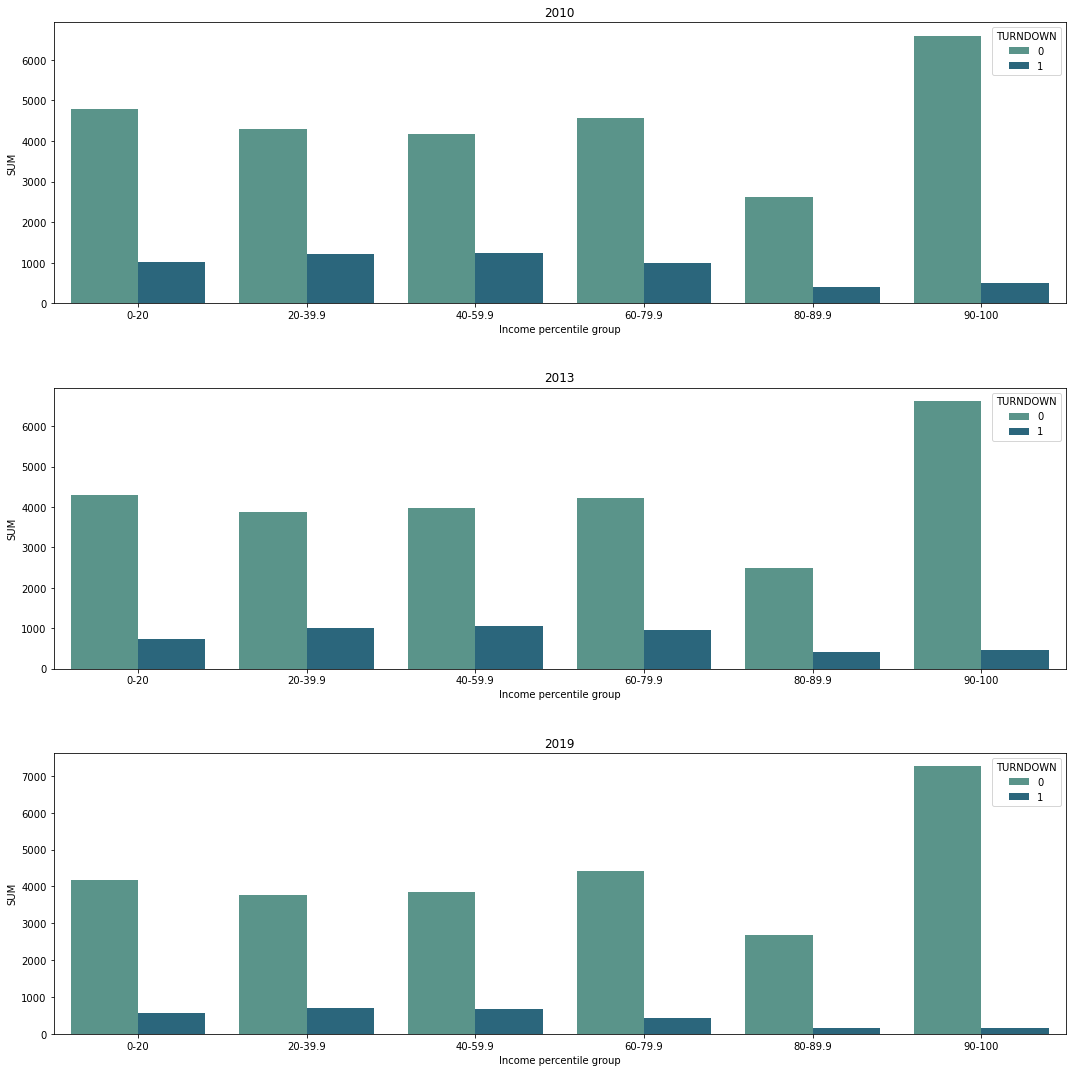

In [135]:
# df_inccat = df[["YEAR", "INCCAT", "TURNFEAR"]].groupby(["YEAR", "INCCAT"]).agg(['count','mean']).reset_index(level=[0,1])
# df_inccat.columns = ["YEAR", "INCCAT","TURNFEAR_count", "TURNFEAR_mean"]
df_inccat = df.groupby(["YEAR", "INCCAT", "TURNDOWN"]).size().reset_index()
df_inccat.rename(columns = {0:'SUM'}, inplace=True)

# Define a dictionary to replace categorical values 
cleanup_nums = {
        "INCCAT": {1: "0-20", 
                 2: "20-39.9", 
                 3: "40-59.9", 
                 4: "60-79.9", 
                 5: "80-89.9", 
                 6: "90-100"},
}

# Replace categorical values with numeric 
df_inccat = df_inccat.replace(cleanup_nums)

fig, axs = plt.subplots(nrows=3, figsize=(15, 15)) 

plt1 = sns.barplot(x="INCCAT", y="SUM", hue="TURNDOWN", data=df_inccat[df_inccat['YEAR']==2010], palette="crest", ax=axs[0]).set(title='2010', xlabel='Income percentile group')
plt2 = sns.barplot(x="INCCAT", y="SUM", hue="TURNDOWN", data=df_inccat[df_inccat['YEAR']==2013], palette="crest", ax=axs[1]).set(title='2013', xlabel='Income percentile group')
plt3 = sns.barplot(x="INCCAT", y="SUM", hue="TURNDOWN", data=df_inccat[df_inccat['YEAR']==2019], palette="crest", ax=axs[2]).set(title='2019', xlabel='Income percentile group')

fig.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()

LEVRATIO: Ratio of total debt to total assets

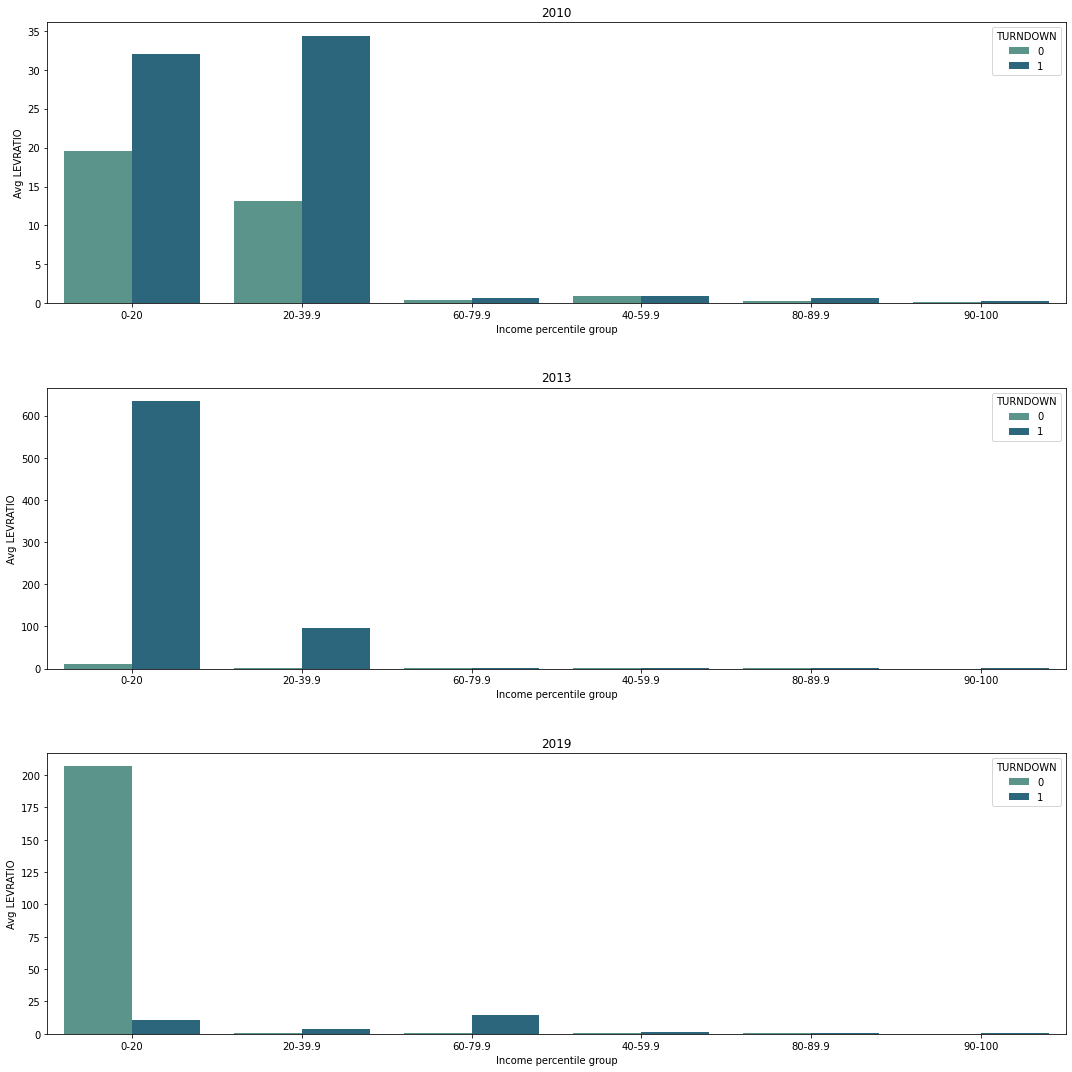

In [153]:
df_levrat = df[["YEAR", "INCCAT", "LEVRATIO", "TURNDOWN"]].groupby(["YEAR", "INCCAT", "TURNDOWN"]).agg('mean').sort_values("LEVRATIO",ascending=False).reset_index() 

# Define a dictionary to replace categorical values 
cleanup_nums = {
        "INCCAT": {1: "0-20", 
                 2: "20-39.9", 
                 3: "40-59.9", 
                 4: "60-79.9", 
                 5: "80-89.9", 
                 6: "90-100"},
}

# Replace categorical values with numeric 
df_levrat = df_levrat.replace(cleanup_nums)

fig, axs = plt.subplots(nrows=3, figsize=(15, 15)) 

plt1 = sns.barplot(x="INCCAT", y="LEVRATIO",hue="TURNDOWN", data=df_levrat[df_levrat['YEAR']==2010], palette="crest", ax=axs[0], order=[i for i in df_levrat["INCCAT"].unique()]).set(title='2010', xlabel='Income percentile group', ylabel='Avg LEVRATIO')
plt2 = sns.barplot(x="INCCAT", y="LEVRATIO",hue="TURNDOWN", data=df_levrat[df_levrat['YEAR']==2013], palette="crest", ax=axs[1], order=[i for i in df_levrat["INCCAT"].unique()]).set(title='2013', xlabel='Income percentile group', ylabel='Avg LEVRATIO')
plt3 = sns.barplot(x="INCCAT", y="LEVRATIO",hue="TURNDOWN", data=df_levrat[df_levrat['YEAR']==2019], palette="crest", ax=axs[2], order=[i for i in df_levrat["INCCAT"].unique()]).set(title='2019', xlabel='Income percentile group', ylabel='Avg LEVRATIO')

fig.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()

In [157]:
# Subset where a customer credit has been turndown before 
df_turndown = df[df["TURNDOWN"]==1]
df_2010 = df_turndown[df_turndown['YEAR']==2010]
df_2013 = df_turndown[df_turndown['YEAR']==2013]
df_2019 = df_turndown[df_turndown['YEAR']==2019]

In [159]:
report_2010 = sweetviz.analyze(df_2010, pairwise_analysis="off")
report_2010.show_html('report2010.html', open_browser=True)

                                             |                                             | [  0%]   00:00 ->…

Report report2010.html was generated.


In [163]:
report_2013 = sweetviz.analyze(df_2013, pairwise_analysis="off")
report_2013.show_html('report2013.html', open_browser=True)

                                             |                                             | [  0%]   00:00 ->…

Report report2013.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [164]:
report_2019 = sweetviz.analyze(df_2019, pairwise_analysis="off")
report_2019.show_html('report2019.html', open_browser=True)

                                             |                                             | [  0%]   00:00 ->…

Report report2019.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Correlation test**

H0: No relation between variables 

H1: There is a significant relation between two variables 

In [51]:
def correlation_test(var1, var2, year):
    if year==2010: 
        cross_df_category = pd.crosstab(df_2010[var1], df_2010[var2])

        chi_square_stats, p_value, degree_of_freedom, expected = chi2_contingency(cross_df_category)

        # interpret p-value
        alpha = 0.05

        print(f"chi_square_stats: {chi_square_stats:.3f}\np-value: {p_value:.4g}")
        if p_value <= alpha:
            print('Dependent (reject H0)')
        else:
            print('Independent (do not reject H0)')
            
    elif year==2013:
        cross_df_category = pd.crosstab(df_2013[var1], df_2013[var2])

        chi_square_stats, p_value, degree_of_freedom, expected = chi2_contingency(cross_df_category)

        # interpret p-value
        alpha = 0.05

        print(f"chi_square_stats: {chi_square_stats:.3f}\np-value: {p_value:.4g}")
        if p_value <= alpha:
            print('Dependent (reject H0)')
        else:
            print('Independent (do not reject H0)')
            
    elif year==2019:
        cross_df_category = pd.crosstab(df_2019[var1], df_2019[var2])

        chi_square_stats, p_value, degree_of_freedom, expected = chi2_contingency(cross_df_category)

        # interpret p-value
        alpha = 0.05

        print(f"chi_square_stats: {chi_square_stats:.3f}\np-value: {p_value:.4g}")
        if p_value <= alpha:
            print('Dependent (reject H0)')
        else:
            print('Independent (do not reject H0)')
    
    else: 
        print("Specify either 2010, 2013 or 2019 year")

In [137]:
print('Correlation between AGE and TURNDOWN')
print('Year 2010')
correlation_test('AGE', 'TURNDOWN', 2010)

print('\nYear 2013')
correlation_test('AGE', 'TURNDOWN', 2013)

print('\nYear 2019')
correlation_test('AGE', 'TURNDOWN', 2019)

Correlation between AGE and TURNDOWN
Year 2010
chi_square_stats: 1624.790
p-value: 2.459e-288
Dependent (reject H0)

Year 2013
chi_square_stats: 1431.495
p-value: 2.016e-248
Dependent (reject H0)

Year 2019
chi_square_stats: 1145.345
p-value: 6.534e-190
Dependent (reject H0)


In [139]:
print('Correlation between EDCL and TURNDOWN')
print('Year 2010')
correlation_test('EDCL', 'TURNDOWN', 2010)

print('\nYear 2013')
correlation_test('EDCL', 'TURNDOWN', 2013)

print('\nYear 2019')
correlation_test('EDCL', 'TURNDOWN', 2019)

Correlation between EDCL and TURNDOWN
Year 2010
chi_square_stats: 439.328
p-value: 6.69e-95
Dependent (reject H0)

Year 2013
chi_square_stats: 425.662
p-value: 6.113e-92
Dependent (reject H0)

Year 2019
chi_square_stats: 488.325
p-value: 1.618e-105
Dependent (reject H0)


In [140]:
print('Correlation between PIRREV and TURNDOWN')
print('Year 2010')
correlation_test('PIRREV', 'TURNDOWN', 2010)

print('\nYear 2013')
correlation_test('PIRREV', 'TURNDOWN', 2013)

print('\nYear 2019')
correlation_test('PIRREV', 'TURNDOWN', 2019)

Correlation between PIRREV and TURNDOWN
Year 2010
chi_square_stats: 11680.325
p-value: 0
Dependent (reject H0)

Year 2013
chi_square_stats: 11111.696
p-value: 0
Dependent (reject H0)

Year 2019
chi_square_stats: 12907.752
p-value: 0
Dependent (reject H0)


In [141]:
print('Correlation between INCCAT and TURNDOWN')
print('Year 2010')
correlation_test('INCCAT', 'TURNDOWN', 2010)

print('\nYear 2013')
correlation_test('INCCAT', 'TURNDOWN', 2013)

print('\nYear 2019')
correlation_test('INCCAT', 'TURNDOWN', 2019)

Correlation between INCCAT and TURNDOWN
Year 2010
chi_square_stats: 771.666
p-value: 1.558e-164
Dependent (reject H0)

Year 2013
chi_square_stats: 687.550
p-value: 2.416e-146
Dependent (reject H0)

Year 2019
chi_square_stats: 895.133
p-value: 3.009e-191
Dependent (reject H0)


In [142]:
print('Correlation between LEVRATIO and TURNDOWN')
print('Year 2010')
correlation_test('LEVRATIO', 'TURNDOWN', 2010)

print('\nYear 2013')
correlation_test('LEVRATIO', 'TURNDOWN', 2013)

print('\nYear 2019')
correlation_test('LEVRATIO', 'TURNDOWN', 2019)

Correlation between LEVRATIO and TURNDOWN
Year 2010
chi_square_stats: 27675.357
p-value: 0
Dependent (reject H0)

Year 2013
chi_square_stats: 26285.203
p-value: 0
Dependent (reject H0)

Year 2019
chi_square_stats: 24660.257
p-value: 0
Dependent (reject H0)
